In [37]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from numpy.random import choice
import seaborn as sns
import pandas as pd
import numpy as np

np.random.seed(561)
sns.set(rc={"figure.figsize":(10, 8)})

In [38]:
dataset = pd.read_csv("./water_potability.csv")
dataset.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [39]:
print("Kích thước dataset : ", dataset.shape)

Kích thước dataset :  (3276, 10)


# Xử lý dữ liệu trống

In [40]:
dataset.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [41]:
dataset.dropna(axis=0, inplace=True)
print(dataset.shape)
print(dataset.isna().sum())

(2011, 10)
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


# Chia dữ liệu Train / Test

In [42]:
# plt.figure(figsize=(20, 5))
# sns.boxplot(data=dataset)

Chia theo tỉ lệ 20/80, stratify theo Potability để tỉ lệ nước uống được/không uống được bằng nhau ở 2 tập train và test

In [51]:
X_train, X_test, Y_train, Y_test=train_test_split(
    dataset[["ph", "Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "Organic_carbon", "Trihalomethanes", "Turbidity"]].fillna(0),
    dataset["Potability"],test_size=0.2, random_state=0, stratify=dataset["Potability"])

Y_train.shape, Y_test.shape

((1608,), (403,))

<AxesSubplot:ylabel='Potability'>

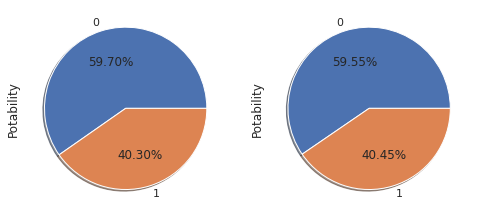

In [49]:
plt.subplot(1, 2, 1)
Y_train_percent = Y_train.value_counts(normalize=True)
Y_train_percent.plot.pie(figsize=(8, 8), shadow=True, autopct='%1.2f%%')

plt.subplot(1, 2, 2)
Y_test_percent = Y_test.value_counts(normalize=True)
Y_test_percent.plot.pie(figsize=(8, 8), shadow=True, autopct='%1.2f%%')